# Classification of Pet’s faces

**In this work, I will focus on "Oxford-IIIT Dataset"** 

Pet's faces dataset is an image dataset. I will proceed a step-by-step approach:

# Step 1: Download and Load the dataset.

In [5]:
import os
import tarfile
import urllib.request

# Define the URL and target path
url = 'https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz'
file_path = 'images.tar.gz'
extract_path = r'C:/Users/ASUS/Desktop/M9 - W2/extracted_images'

# Function to download with retries
def download_with_retries(url, file_path, retries=3):
    for attempt in range(retries):
        try:
            print(f"Downloading {file_path} (Attempt {attempt + 1} of {retries})...")
            urllib.request.urlretrieve(url, file_path)
            print("Download complete.")
            return
        except Exception as e:
            print(f"Download failed: {e}")
            if attempt < retries - 1:
                print("Retrying...")
            else:
                raise e

# Download the file if it doesn't exist or is incomplete
if not os.path.exists(file_path) or os.path.getsize(file_path) < 791918971:
    try:
        download_with_retries(url, file_path)
    except Exception as e:
        print(f"Failed to download file after multiple attempts: {e}")
        exit()
else:
    print(f"{file_path} already exists and appears complete.")


Download complete.


In [6]:
# Define the extraction path
extract_path = r'C:/Users/ASUS/Desktop/M9 - W2/extracted_images'

# Recursive directory inspection
print("Inspecting directory structure within:", extract_path)
for root, dirs, files in os.walk(extract_path):
    level = root.replace(extract_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for file in files:
        print(f"{subindent}{file}")

Inspecting directory structure within: C:/Users/ASUS/Desktop/M9 - W2/extracted_images


In [7]:
import shutil

# Define URL and paths
url = 'https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz'
file_path = 'images.tar.gz'
extract_path = r'C:/Users/ASUS/Desktop/M9 - W2/extracted_images'
temp_extract_path = os.path.join(extract_path, 'temp')  # Temporary extraction directory
cats_dir = os.path.join(extract_path, 'cats')
dogs_dir = os.path.join(extract_path, 'dogs')

# Define known cat and dog prefixes based on the dataset
cat_prefixes = ['abyssinian', 'bengal', 'birman', 'bombay', 'british', 'egyptian', 'maine', 'persian', 'ragdoll', 'russian', 'siamese', 'sphynx']
dog_prefixes = ['american', 'basenji', 'beagle', 'boxer', 'chihuahua', 'dachshund', 'pomeranian', 'poodle', 'schnauzer', 'staffordshire', 'wheaten']

# Ensure clean directories for re-organization
for dir_path in [temp_extract_path, cats_dir, dogs_dir]:
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)
    os.makedirs(dir_path)

# Download the file if it doesn't exist
def download_file(url, file_path):
    if not os.path.exists(file_path):
        print("Downloading dataset...")
        urllib.request.urlretrieve(url, file_path)
        print("Download completed.")

# Download if needed
download_file(url, file_path)

# Safe extraction into temporary directory
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path=temp_extract_path)

# Move images to 'cats' and 'dogs' folders based on prefixes
for root, _, files in os.walk(temp_extract_path):
    for filename in files:
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_prefix = filename.lower().split('_')[0]
            if file_prefix in cat_prefixes:
                shutil.move(os.path.join(root, filename), os.path.join(cats_dir, filename))
            elif file_prefix in dog_prefixes:
                shutil.move(os.path.join(root, filename), os.path.join(dogs_dir, filename))

# Clean up the temporary extraction directory
shutil.rmtree(temp_extract_path)

print("Re-organization completed.")
print("Contents of cats directory:", os.listdir(cats_dir)[:10])  # Display first 10 items
print("Contents of dogs directory:", os.listdir(dogs_dir)[:10])  # Display first 10 items

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15160\3217452211.py:33: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=temp_extract_path)


Re-organization completed.
Contents of cats directory: ['Abyssinian_1.jpg', 'Abyssinian_10.jpg', 'Abyssinian_100.jpg', 'Abyssinian_101.jpg', 'Abyssinian_102.jpg', 'Abyssinian_103.jpg', 'Abyssinian_104.jpg', 'Abyssinian_105.jpg', 'Abyssinian_106.jpg', 'Abyssinian_107.jpg']
Contents of dogs directory: ['american_bulldog_10.jpg', 'american_bulldog_100.jpg', 'american_bulldog_101.jpg', 'american_bulldog_102.jpg', 'american_bulldog_103.jpg', 'american_bulldog_104.jpg', 'american_bulldog_105.jpg', 'american_bulldog_106.jpg', 'american_bulldog_107.jpg', 'american_bulldog_108.jpg']


# Step 2: Visualization at Least 20 Images on a Grid using ImageFolder

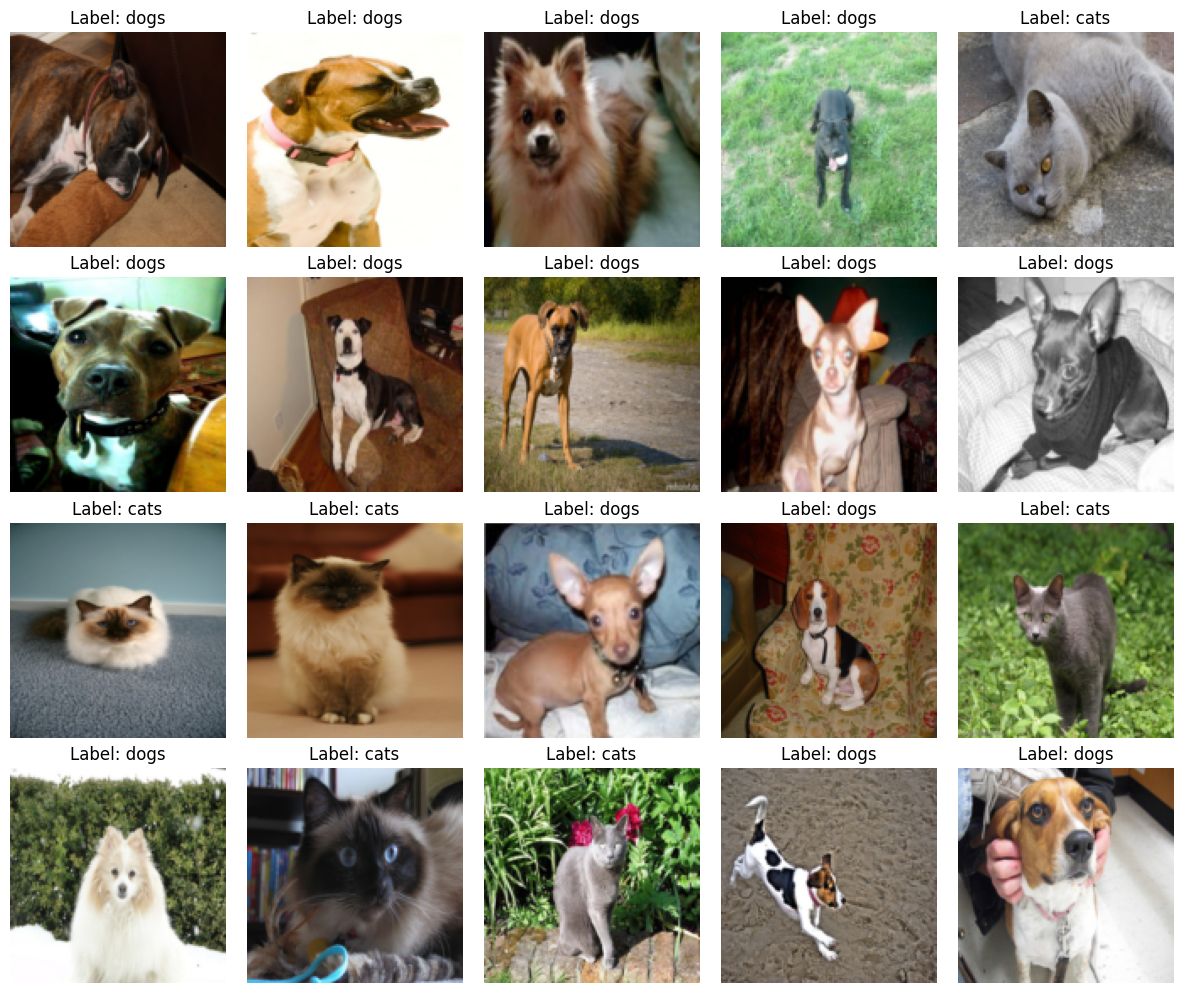

In [9]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to 128x128
    transforms.ToTensor()           # Convert to tensor
])

# Load the dataset
data_dir = r'C:/Users/ASUS/Desktop/M9 - W2/extracted_images'
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
data_loader = DataLoader(dataset, batch_size=20, shuffle=True)

# Get a batch of images and labels
images, labels = next(iter(data_loader))

# Plot images in a grid
fig, axes = plt.subplots(4, 5, figsize=(12, 10))  # 4x5 grid for 20 images

for i, ax in enumerate(axes.flat):
    img = images[i].numpy().transpose((1, 2, 0))  # Convert tensor to NumPy and rearrange dimensions
    img = np.clip(img, 0, 1)  # Ensure pixel values are in [0, 1] for display
    
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {dataset.classes[labels[i]]}")

plt.tight_layout()
plt.show()

In [10]:
from PIL import Image
import numpy as np

# Load and inspect an image from the extracted folder
# Replace 'Abyssinian_1.jpg' with an actual image name from the dataset
image_path = 'C:/Users/ASUS/Desktop/M9 - W2/extracted_images/cats/Abyssinian_1.jpg'
with Image.open(image_path) as img:
    # Convert the image to a numpy array
    data = np.array(img)
    
    # Show image properties
    print("Image shape:", data.shape)
    print("Image mode:", img.mode)  # 'RGB' for color images
    print("Image size:", img.size)

    # Inspecting top-left corner and color channels
    print("Top-left corner (10x10) of red channel:\n", data[:10, :10, 0])
    print("Top-left corner (10x10) of green channel:\n", data[:10, :10, 1])
    print("Top-left corner (10x10) of blue channel:\n", data[:10, :10, 2])

Image shape: (400, 600, 3)
Image mode: RGB
Image size: (600, 400)
Top-left corner (10x10) of red channel:
 [[30 30 30 30 30 30 30 30 32 32]
 [29 29 30 30 30 31 31 31 32 32]
 [29 29 29 30 31 32 32 32 32 32]
 [28 29 29 30 31 32 33 33 32 32]
 [29 29 30 31 32 33 33 34 32 32]
 [30 30 30 31 32 33 33 33 32 32]
 [31 31 31 32 32 32 33 33 32 32]
 [32 32 32 32 32 32 32 32 32 32]
 [31 31 32 32 33 33 34 34 30 30]
 [31 31 32 32 33 33 34 34 31 31]]
Top-left corner (10x10) of green channel:
 [[38 38 38 38 38 38 38 38 42 42]
 [37 37 38 38 38 39 39 39 42 42]
 [37 37 37 38 39 40 40 40 42 42]
 [36 37 37 38 39 40 41 41 42 42]
 [37 37 38 39 40 41 41 42 42 42]
 [38 38 38 39 40 41 41 41 42 42]
 [39 39 39 40 40 40 41 41 42 42]
 [40 40 40 40 40 40 40 40 42 42]
 [39 39 40 40 41 41 42 42 40 40]
 [39 39 40 40 41 41 42 42 41 41]]
Top-left corner (10x10) of blue channel:
 [[27 27 27 27 27 27 27 27 31 31]
 [26 26 27 27 27 28 28 28 31 31]
 [26 26 26 27 28 29 29 29 31 31]
 [25 26 26 27 28 29 30 30 31 31]
 [26 26 27 28 

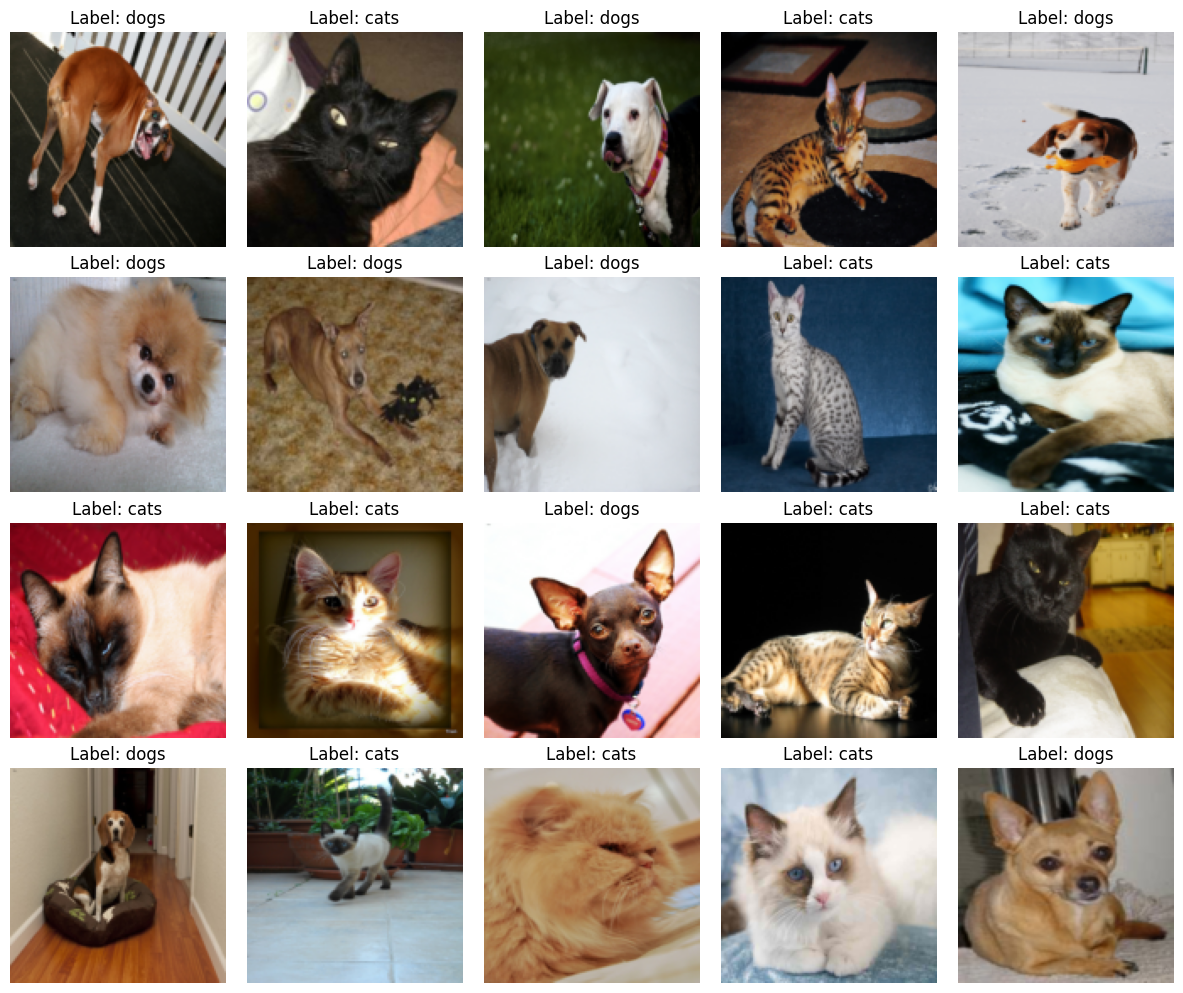

In [11]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to 128x128
    transforms.ToTensor()           # Convert to tensor
])

# Load the dataset
data_dir = r'C:/Users/ASUS/Desktop/M9 - W2/extracted_images'
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
data_loader = DataLoader(dataset, batch_size=20, shuffle=True)

# Get a batch of images and labels
images, labels = next(iter(data_loader))

# Plot images in a grid
fig, axes = plt.subplots(4, 5, figsize=(12, 10))  # 4x5 grid for 20 images

for i, ax in enumerate(axes.flat):
    img = images[i].numpy().transpose((1, 2, 0))  # Convert tensor to NumPy and rearrange dimensions
    img = np.clip(img, 0, 1)  # Ensure pixel values are in [0, 1] for display
    
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {dataset.classes[labels[i]]}")

plt.tight_layout()
plt.show()

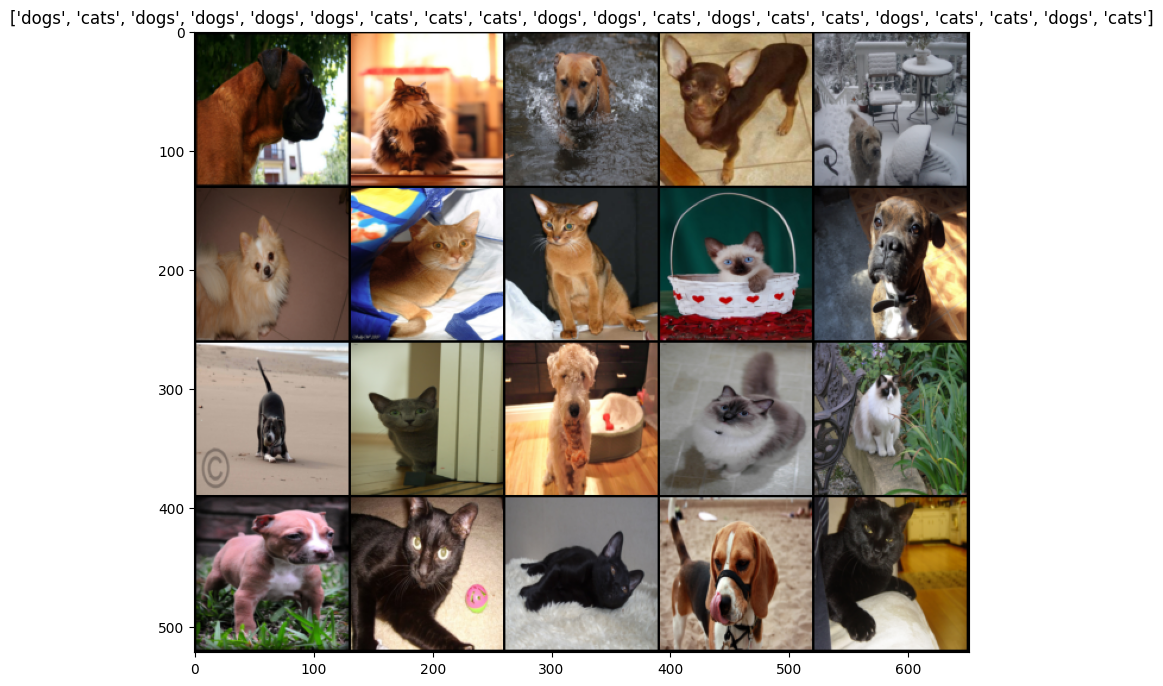

In [12]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Subset
import torchvision.utils as vutils

# Path to the extracted dataset (update this to the actual path where your images are located)
data_dir = r'C:/Users/ASUS/Desktop/M9 - W2/extracted_images'

# Transform: convert to tensor
transform = transforms.Compose([transforms.Resize((128, 128)), transforms.ToTensor()])

# Load dataset
dataset = ImageFolder(data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=20, shuffle=True)

# Get a batch of 20 images and labels
data_iter = iter(dataloader)
images, labels = next(data_iter)  # Use next() function to get the next batch

# Make a grid
grid_img = vutils.make_grid(images, nrow=5)

# Visualize the images
plt.figure(figsize=(10,10))
plt.imshow(grid_img.permute(1, 2, 0))  # Change dimensions for visualization
plt.title([dataset.classes[label] for label in labels])
plt.show()

# Step 3: Filter Dataset for Cats and Dogs

In [14]:
import numpy as np
# The number of image categories
n_categories = 2

# The unique values of categories in the data
categories = np.array(["cats", "dogs"])

# Example list of labels; replace with your actual label data
labels = ["cats", "dogs", "cats", "cats", "dogs"]

# Initialize one-hot encoded labels as zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels and encode them in one-hot format
for i, label in enumerate(labels):
    # Find the index of this label in the categories array
    category_index = np.where(categories == label)[0][0]
    # Set the corresponding position to 1
    ohe_labels[i, category_index] = 1

print("One-hot encoded labels:\n", ohe_labels)

One-hot encoded labels:
 [[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


# Step 4: Cross-Validation for Cats vs. Dogs Classification with Train-Test Split

* KFold: This ensures that each fold has the same proportion of each class.
* Training the model on each fold: For each fold, you train on the training set and evaluate on the validation set.
* Preserve label variation: Cross-validation ensures that each fold represents the entire dataset's label distribution.

In [16]:
import os
import numpy as np
from PIL import Image

# Set paths to your dataset
cats_dir = 'C:/Users/ASUS/Desktop/M9 - W2/extracted_images/cats'
dogs_dir = 'C:/Users/ASUS/Desktop/M9 - W2/extracted_images/dogs'

# Load your images and labels
def load_data(cats_dir, dogs_dir):
    cats = [os.path.join(cats_dir, f) for f in os.listdir(cats_dir) if f.endswith(('jpg', 'jpeg', 'png'))]
    dogs = [os.path.join(dogs_dir, f) for f in os.listdir(dogs_dir) if f.endswith(('jpg', 'jpeg', 'png'))]
    
    images = []
    labels = []
    
    # Load images and labels
    for img_path in cats:
        try:
            img = Image.open(img_path).resize((64, 64))  # Resize to a fixed size
            
            # Convert to RGB (this will handle both grayscale and RGBA images)
            img = img.convert('RGB')
            
            img_array = np.array(img)
            if img_array.shape == (64, 64, 3):  # Ensure it has the correct shape
                images.append(img_array)
                labels.append(0)  # Label for cats
            else:
                print(f"Unexpected image shape for {img_path}: {img_array.shape}")
        except Exception as e:
            print(f"Error loading cat image {img_path}: {e}")

    for img_path in dogs:
        try:
            img = Image.open(img_path).resize((64, 64))
            img = img.convert('RGB')  # Convert to RGB
            
            img_array = np.array(img)
            if img_array.shape == (64, 64, 3):  # Ensure it has the correct shape
                images.append(img_array)
                labels.append(1)  # Label for dogs
            else:
                print(f"Unexpected image shape for {img_path}: {img_array.shape}")
        except Exception as e:
            print(f"Error loading dog image {img_path}: {e}")

    # Convert lists to NumPy arrays
    try:
        images_array = np.array(images)
        labels_array = np.array(labels)
    except ValueError as e:
        print(f"Error creating NumPy array: {e}")
        print("Shapes of images:", [img.shape for img in images])  # Debugging info

    return images_array, labels_array

# Load data
X, y = load_data(cats_dir, dogs_dir)

print("Loaded data shapes:", X.shape, y.shape)


Loaded data shapes: (3991, 64, 64, 3) (3991,)


In [17]:
import numpy as np
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# Assuming X and y are your data arrays as previously defined

# Convert labels to categorical
y_categorical = to_categorical(y)

# Define the number of folds
num_folds = 5

# KFold cross-validation setup
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Function to create the model
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(64, 64, 3)))  # Flattening the 2D images into 1D
    model.add(Dense(128, activation='relu'))  # Hidden layer with 128 neurons
    model.add(Dense(64, activation='relu'))   # Another hidden layer
    model.add(Dense(2, activation='softmax'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# List to hold accuracy for each fold
fold_accuracies = []

# Perform KFold cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_categorical[train_index], y_categorical[val_index]
    
    # Create a new model for each fold
    model = create_model()
    
    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)  # Adjust epochs as needed
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
    fold_accuracies.append(accuracy)
    print(f'Fold Accuracy: {accuracy:.4f}')

# Average accuracy across all folds
average_accuracy = np.mean(fold_accuracies)
print(f'Average Accuracy: {average_accuracy:.4f}')


C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5410 - loss: 316.2423
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5279 - loss: 59.0933
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5734 - loss: 18.7696
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5691 - loss: 5.6725
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5670 - loss: 4.9475
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5678 - loss: 4.0536
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6117 - loss: 1.4979
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6393 - loss: 0.7699
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6174 - loss: 0.9534
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6057 - loss: 0.7805
Fold Accuracy: 0.6233
Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5118 - loss: 221.8420
Epoch 2/10
100

# Step 5: Experimenting with Different CNN Architectures

Incorporating ReLU activations and Max Pooling between convolutional layers is crucial for building an effective Convolutional Neural Network (CNN). Additionally, the final classifier layer should have the correct number of neurons (output classes), and you may choose to include or exclude fully connected hidden layers based on the architecture complexity.

Let’s create a CNN architecture that adheres to these principles and train it using the cross-validation approach.

Key Elements:

* ReLU Activation: After each convolutional layer, ReLU introduces non-linearity to the model.
* Max Pooling: Helps in downsampling, reducing spatial dimensions and making the network more computationally efficient.
* Output Layer: The final layer should have the same number of neurons as the number of classes (in this case, 2 for "cats" and "dogs").

**5.1: Basic CNN Architecture**

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential()

# Using Input layer to define the input shape
model.add(Input(shape=(64, 64, 3)))

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and output layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(2, activation='softmax'))  # Binary classification

**5.2: Training Loop for Cross-Validation**

In [24]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Load and preprocess your dataset here
# Assuming X is your image data and y are your labels
# X.shape should be (num_samples, height, width, channels)
# y.shape should be (num_samples,)

# Example shape
num_samples = 3991
X = np.random.rand(num_samples, 64, 64, 3)  # Replace with your actual data
y = np.random.randint(2, size=num_samples)   # Replace with your actual labels

# Define the CNN model
def create_model():
    model = Sequential()
    model.add(Input(shape=(64, 64, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))  # Assuming binary classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Create a new model instance for each fold
    model = create_model()
    
    # Data augmentation
    datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=20)
    datagen.fit(X_train)
    
    # Fit the model
    model.fit(datagen.flow(X_train, y_train, batch_size=32),
              epochs=10,  # Adjust as needed
              validation_data=(X_test, y_test),
              verbose=1)

    # Evaluate the model
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(y_test, predicted_classes)
    fold_accuracies.append(accuracy)
    print(f"Fold Accuracy: {accuracy:.4f}")

# Print average accuracy across all folds
print(f"Average K-Fold Accuracy: {np.mean(fold_accuracies):.4f}")


C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.4949 - loss: 0.7318 - val_accuracy: 0.5181 - val_loss: 0.6928
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.5123 - loss: 0.6930 - val_accuracy: 0.5181 - val_loss: 0.6927
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.5151 - loss: 0.6927 - val_accuracy: 0.5181 - val_loss: 0.6927
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.4981 - loss: 0.6934 - val_accuracy: 0.5181 - val_loss: 0.6926
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.5137 - loss: 0.6927 - val_accuracy: 0.5181 - val_loss: 0.6926
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.4885 - loss: 0.6938 - val_accuracy: 0.5181 - val_loss: 0.6925
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.5194 - loss: 0.6925 - val_accuracy: 0.5181 - val_loss: 0.6925
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.5034 - loss: 0

C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.5015 - loss: 0.7548 - val_accuracy: 0.5025 - val_loss: 0.6940
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.5197 - loss: 0.6930 - val_accuracy: 0.5025 - val_loss: 0.6933
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.5144 - loss: 0.6930 - val_accuracy: 0.5025 - val_loss: 0.6932
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.5218 - loss: 0.6924 - val_accuracy: 0.5025 - val_loss: 0.6933
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.4977 - loss: 0.6930 - val_accuracy: 0.5025 - val_loss: 0.6934
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.5257 - loss: 0.6923 - val_accuracy: 0.5025 - val_loss: 0.6933
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.5152 - loss: 0.6926 - val_accuracy: 0.5025 - val_loss: 0.6933
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.5133 - loss: 0.6928 - val

C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.4796 - loss: 0.8003 - val_accuracy: 0.5075 - val_loss: 0.6930
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.5118 - loss: 0.6930 - val_accuracy: 0.5075 - val_loss: 0.6930
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.4994 - loss: 0.6932 - val_accuracy: 0.5075 - val_loss: 0.6931
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.5205 - loss: 0.6925 - val_accuracy: 0.5075 - val_loss: 0.6931
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.5061 - loss: 0.6933 - val_accuracy: 0.5075 - val_loss: 0.6930
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.5185 - loss: 0.6926 - val_accuracy: 0.5075 - val_loss: 0.6931
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.5248 - loss: 0.6922 - val_accuracy: 0.5075 - val_loss: 0.6930
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.5186 - loss: 0.6928 - val_

C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step - accuracy: 0.5194 - loss: 0.7348 - val_accuracy: 0.5063 - val_loss: 0.6930
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.5187 - loss: 0.6926 - val_accuracy: 0.5063 - val_loss: 0.6931
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.5170 - loss: 0.6930 - val_accuracy: 0.5063 - val_loss: 0.6931
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.5132 - loss: 0.6928 - val_accuracy: 0.5063 - val_loss: 0.6932
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.5185 - loss: 0.6930 - val_accuracy: 0.5063 - val_loss: 0.6932
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.5129 - loss: 0.6936 - val_accuracy: 0.5063 - val_loss: 0.6932
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.5110 - loss: 0.6931 - val_accuracy: 0.5063 - val_loss: 0.6931
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.5175 - loss: 0.6921 - val

C:\Users\ASUS\anaconda3\envs\MyEnvironment\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - accuracy: 0.4837 - loss: 0.9361 - val_accuracy: 0.5213 - val_loss: 0.6928
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.5166 - loss: 0.6929 - val_accuracy: 0.5213 - val_loss: 0.6928
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.5021 - loss: 0.6933 - val_accuracy: 0.5213 - val_loss: 0.6927
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.4990 - loss: 0.6932 - val_accuracy: 0.5213 - val_loss: 0.6925
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.5108 - loss: 0.6932 - val_accuracy: 0.4787 - val_loss: 0.7006
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.5246 - loss: 0.6913 - val_accuracy: 0.5213 - val_loss: 0.6925
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.5029 - loss: 0.6931 - val_accuracy: 0.5213 - val_loss: 0.6927
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.5193 - loss: 0.6928 - val

# Step 6: Plotting Accuracy and Loss

- **Overfitting:** When training accuracy is high and validation accuracy is low, this is a sign of overfitting.
- **Underfitting:** When both training and validation accuracy are low, the model may not be complex enough to capture the patterns in the data.
- **Generalization:** When both training and validation accuracy are close to each other, and validation loss is low, this indicates good generalization.

In [44]:
# Plot Accuracy and Loss
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Step 7: Conclusion

Both training and validation accuracy are same, and validation loss is very low, this indicates good generalization.